# Import and Install dependencies

In [1]:
import torchvision
from google.colab.patches import cv2_imshow

In [2]:
import numpy as np
import pandas as pd
import os
import random
from PIL import Image, ImageDraw
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torchvision
from torchvision import transforms as T
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.io import read_image, ImageReadMode

In [3]:
!pip install fiftyone
!pip install fiftyone-db-ubuntu2204

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 12.8 MB/s eta 0:00:00


In [4]:
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py

--2023-11-30 14:10:57--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23628 (23K) [text/plain]
Saving to: ‘transforms.py’

transforms.py       100%[===================>]  23.07K  --.-KB/s    in 0s      

2023-11-30 14:10:57 (47.9 MB/s) - ‘transforms.py’ saved [23628/23628]

--2023-11-30 14:10:57--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4063 (4.0K)

In [140]:
import fiftyone as fo
import fiftyone.zoo as foz

# Load the COCO-2017 dataset
# This will download it from the FiftyOne Dataset Zoo if necessary
dataset = foz.load_zoo_dataset("coco-2017", split="train", label_types=["detections"], classes=["person"], max_samples=4000)
dataset_test = foz.load_zoo_dataset("coco-2017", split="validation", label_types=["detections"], classes=["person"], max_samples=500)

# Print summary information about the view
print(dataset)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


Loading existing dataset 'coco-2017-train-4000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'coco-2017-train-4000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


Loading existing dataset 'coco-2017-validation-500'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'coco-2017-validation-500'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


Name:        coco-2017-train-4000
Media type:  image
Num samples: 4000
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:      fiftyone.core.fields.IntField
    eval_fp:      fiftyone.core.fields.IntField
    eval_fn:      fiftyone.core.fields.IntField


In [6]:
import torch
import torchvision

# Run the model on GPU if it is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load a pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
model.to(device)
model.eval()

print("Model ready")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth
100%|██████████| 74.2M/74.2M [00:00<00:00, 135MB/s]


Model ready


In [7]:
dataset.persistent = True
print(dataset)

Name:        coco-2017-train-4000
Media type:  image
Num samples: 4000
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [8]:
sample = dataset.first()
print(sample.ground_truth.detections[1])

<Detection: {
    'id': '65689b8e021e2446227ef70e',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.3483991683991684,
        0.25451562499999997,
        0.6457588357588357,
        0.726859375,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'person',
    'iscrowd': 0,
}>


## Add predictions to dataset

In [9]:
predictions_view = dataset.take(500, seed=43)

In [10]:
from PIL import Image
from torchvision.transforms import functional as func

import fiftyone as fo

# Get class list
classes = 'person'

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes,
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |█████████████████| 500/500 [39.3s elapsed, 0s remaining, 19.5 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [39.3s elapsed, 0s remaining, 19.5 samples/s]      


Finished adding predictions


In [11]:
from fiftyone import ViewField as F

# Only contains detections with confidence >= 0.75
high_conf_view = predictions_view.filter_labels("faster_rcnn", F("confidence") > 0.75, only_matches=False)

In [12]:
# Print some information about the view
print(high_conf_view)

Dataset:     coco-2017-train-4000
Media type:  image
Num samples: 500
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. Take(size=500, seed=43)
    2. FilterLabels(field='faster_rcnn', filter={'$gt': ['$$this.confidence', 0.75]}, only_matches=False, trajectories=False)


In [13]:
# Print a prediction from the view to verify that its confidence is > 0.75
sample = high_conf_view.first()
print(sample.faster_rcnn.detections[0])

<Detection: {
    'id': '65689c38021e2446227fac33',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.4468437671661377,
        0.17580012555392283,
        0.48923420906066895,
        0.8033590496711012,
    ],
    'mask': None,
    'confidence': 0.9995365142822266,
    'index': None,
}>


## Evaluate detections

In [14]:
results = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████| 500/500 [17.6s elapsed, 0s remaining, 41.6 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [17.6s elapsed, 0s remaining, 41.6 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████| 500/500 [10.1s elapsed, 0s remaining, 69.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [10.1s elapsed, 0s remaining, 69.1 samples/s]      


In [15]:
# Get the 10 most common classes in the dataset
counts = dataset.count_values("ground_truth.detections.label")
classes_top1 = sorted(counts, key=counts.get, reverse=True)[:1]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top1)

              precision    recall  f1-score   support

      person       0.51      0.66      0.58      1989

   micro avg       0.51      0.66      0.58      1989
   macro avg       0.51      0.66      0.58      1989
weighted avg       0.51      0.66      0.58      1989



In [16]:
plot = results.plot_pr_curves(classes=["person", "car"])
plot.show()

In [17]:
session = fo.launch_app(dataset)


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.22.3

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.22.3

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



In [18]:
# Load high confidence view in the App
session.view = high_conf_view

## Faster RCNN manual training without fiftyone

In [19]:
# Iterate over the dataset
for sample in dataset:
    # Get the detections
    detections = sample.ground_truth.detections
    # Filter out non-person detections
    detections = [d for d in detections if d.label == "person"]
    # Update the detections
    sample.ground_truth.detections = detections
    # Save the sample
    sample.save()

In [20]:
# Iterate over the dataset_test
for sample in dataset_test:
    # Get the detections
    detections = sample.ground_truth.detections
    # Filter out non-person detections
    detections = [d for d in detections if d.label == "person"]
    # Update the detections
    sample.ground_truth.detections = detections
    # Save the sample
    sample.save()

In [26]:
view = dataset.view()
sample = view.take(1).first()
sample

<SampleView: {
    'id': '65689b93021e2446227f1912',
    'media_type': 'image',
    'filepath': '/root/fiftyone/coco-2017/train/data/000000007519.jpg',
    'tags': ['train'],
    'metadata': <ImageMetadata: {
        'size_bytes': None,
        'mime_type': None,
        'width': 640,
        'height': 480,
        'num_channels': None,
    }>,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '65689b93021e2446227f181d',
                'attributes': {},
                'tags': [],
                'label': 'person',
                'bounding_box': [
                    0.20056250000000003,
                    0.07864583333333333,
                    0.483703125,
                    0.9101250000000001,
                ],
                'mask': None,
                'confidence': None,
                'index': None,
                'supercategory': 'person',
                'iscrowd': 0,
            }>,
        ],
    }>,
    'fas

In [27]:
width = sample.metadata.width
height = sample.metadata.height
bbox = sample.ground_truth.detections[0].bounding_box
x1, y1, x2, y2 = bbox
x1 * width, y1 * height, x2 * width, y2 * height

(128.36, 37.75, 309.57, 436.86)

In [28]:
# Classes list
classes = dataset.distinct("ground_truth.detections.label")

# The directory in which the dataset's images are stored
IMAGES_DIR = os.path.dirname(dataset.first().filepath)

# Export some labels in COCO format
dataset.take(100).export(
    dataset_type=fo.types.COCODetectionDataset,
    label_field="ground_truth",
    labels_path="coco.json",
    classes=classes,
)

 100% |█████████████████| 100/100 [219.8ms elapsed, 0s remaining, 455.0 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 100/100 [219.8ms elapsed, 0s remaining, 455.0 samples/s]      


In [41]:
sample = view['/root/fiftyone/coco-2017/train/data/000000000049.jpg']

In [42]:
width = sample.metadata.width
height = sample.metadata.height
bbox = sample.ground_truth.detections[0].bounding_box
x1, y1, x2, y2 = bbox
x1, y1, x2, y2

(0.5338320209973753, 0.52086, 0.17241469816272964, 0.14608000000000002)

In [43]:
x1 *  width, y1 * height, x2 * width, y2 * height

(203.39, 260.43, 65.69, 73.04)

In [44]:
x2 * width * y2 * height

4797.997600000001

In [45]:
transform = T.Compose([
    T.ToPILImage(),
    #T.CenterCrop(10),
    T.ToTensor(),
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [46]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transforms, root):
        self.dataset = dataset
        self.transforms = transforms
        self.root = root
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "data"))))

    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.root, "data", self.imgs[idx])
        img = read_image(img_path, mode=ImageReadMode.RGB )

        view = self.dataset.view()
        sample = view[img_path]

        # get bounding box coordinates for each detection
        width = sample.metadata.width
        height = sample.metadata.height
        boxes = []
        for d in sample.ground_truth.detections:
            x,y,w,h = d.bounding_box
            x1 = x * width
            y1 = y * height
            x2 = x1 + (w * width)
            y2 = y1 + (h * height)
            boxes.append([x1, y1, x2, y2])

        boxes = torch.tensor(boxes);

        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        num_objs = len(sample.ground_truth.detections)

        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)

        image_id = idx
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        # Wrap sample and targets into torchvision tv_tensors:
        # img = tv_tensors.Image(img)

        target = {}
        target["boxes"] = boxes
        # target["masks"] = None
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img = self.transforms(img)

        return (img, target)

    def __len__(self):
        return len(self.imgs)

In [47]:
from torch.utils.data import DataLoader
import utils

train_data_dir = '/root/fiftyone/coco-2017/train'
test_data_dir = '/root/fiftyone/coco-2017/validation'

train_dataset = CustomDataset(root=train_data_dir, dataset=dataset, transforms=transform)
test_dataset = CustomDataset(root=test_data_dir, dataset=dataset_test, transforms=transform)
# train_dataset = ObjectDataset(dataset, transforms=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=utils.collate_fn)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=utils.collate_fn)

In [48]:
import matplotlib.pyplot as plt

images, targets = next(iter(train_loader))
image = images[0]
target = targets[0]
image, target

(tensor([[[-0.3647, -0.3333, -0.2078,  ..., -0.4902, -0.4824, -0.4745],
          [-0.3412, -0.3333, -0.2157,  ..., -0.4196, -0.4196, -0.4196],
          [-0.2941, -0.2941, -0.2000,  ..., -0.4510, -0.4510, -0.4588],
          ...,
          [-0.8745, -0.8196, -0.8039,  ..., -0.9373, -0.8980, -0.8745],
          [-0.8039, -0.8196, -0.8196,  ..., -0.7804, -0.7569, -0.7490],
          [-0.7961, -0.8196, -0.8196,  ..., -0.6314, -0.6078, -0.6000]],
 
         [[-0.6863, -0.6235, -0.4824,  ..., -0.6784, -0.6706, -0.6627],
          [-0.6549, -0.6235, -0.4902,  ..., -0.6314, -0.6314, -0.6314],
          [-0.6078, -0.5843, -0.4667,  ..., -0.6627, -0.6627, -0.6706],
          ...,
          [-0.8824, -0.8275, -0.8118,  ..., -0.9373, -0.8980, -0.8745],
          [-0.8118, -0.8275, -0.8118,  ..., -0.8039, -0.7961, -0.7882],
          [-0.8039, -0.8275, -0.8118,  ..., -0.6549, -0.6471, -0.6392]],
 
         [[-0.8588, -0.8353, -0.7333,  ..., -0.7569, -0.7490, -0.7412],
          [-0.8510, -0.8510,

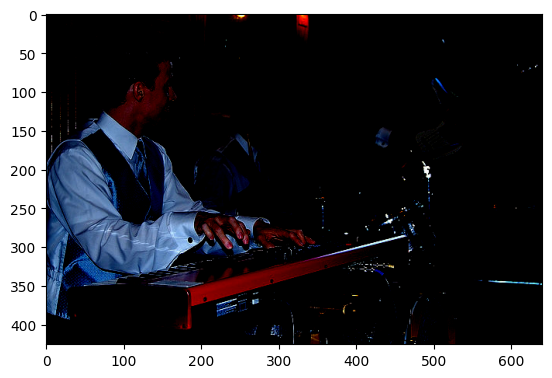

In [49]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(image.permute(1, 2, 0) )

In [50]:
num = len(target['boxes'])

igg = image.permute(1, 2, 0).numpy().astype(np.uint8).copy()
for i in range(num):
  x1, y1, x2, y2 = np.array(target['boxes'][i]).astype("int")
  print(x1,y1,x2,y2)
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (255, 0, 0), 1)

0 21 347 404
187 96 308 271
391 16 567 267


In [51]:
type(target['boxes'][i])

torch.Tensor

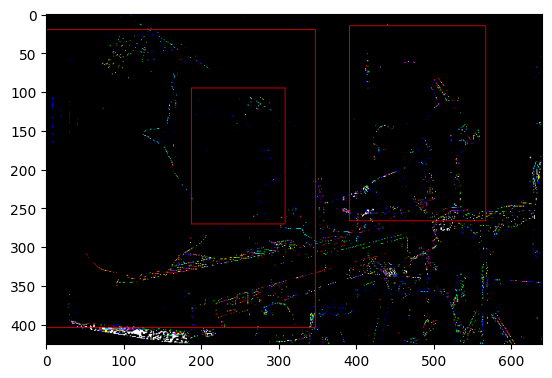

In [52]:
plt.imshow(igg)

In [53]:
import torchvision

model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
num_class = 2
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_class)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.



In [54]:
from engine import train_one_epoch, evaluate
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.005,
    momentum=0.9,
    weight_decay=0.0005
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

num_epochs = 5

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, test_loader, device=device)

print("That's it!")

Epoch: [0]  [   0/1000]  eta: 0:17:37  lr: 0.000010  loss: 1.1401 (1.1401)  loss_classifier: 0.6557 (0.6557)  loss_box_reg: 0.2828 (0.2828)  loss_objectness: 0.1765 (0.1765)  loss_rpn_box_reg: 0.0251 (0.0251)  time: 1.0580  data: 0.0473  max mem: 1849
Epoch: [0]  [  10/1000]  eta: 0:05:51  lr: 0.000060  loss: 1.1730 (1.2589)  loss_classifier: 0.6059 (0.6060)  loss_box_reg: 0.4291 (0.4662)  loss_objectness: 0.1496 (0.1413)  loss_rpn_box_reg: 0.0461 (0.0454)  time: 0.3547  data: 0.0475  max mem: 2298
Epoch: [0]  [  20/1000]  eta: 0:05:13  lr: 0.000110  loss: 1.1360 (1.1985)  loss_classifier: 0.5550 (0.5561)  loss_box_reg: 0.4342 (0.4553)  loss_objectness: 0.1071 (0.1349)  loss_rpn_box_reg: 0.0461 (0.0522)  time: 0.2834  data: 0.0451  max mem: 2623
Epoch: [0]  [  30/1000]  eta: 0:04:57  lr: 0.000160  loss: 1.0303 (1.1417)  loss_classifier: 0.4232 (0.4893)  loss_box_reg: 0.4364 (0.4477)  loss_objectness: 0.1121 (0.1536)  loss_rpn_box_reg: 0.0388 (0.0511)  time: 0.2801  data: 0.0428  max me

In [100]:
transform1 = T.Compose([
    T.ToTensor(),
])

In [101]:
ig = Image.open("/root/fiftyone/coco-2017/train/data/000000000790.jpg")
img = transform1(ig).to('cuda')

In [102]:
with torch.no_grad():
  pred = model([img])

In [103]:
pred

[{'boxes': tensor([[  7.2333, 115.8894, 199.9679, 419.0766],
          [430.7553, 131.4927, 632.4135, 399.2512],
          [212.0225,  78.9696, 308.5698, 194.9501],
          [340.7963, 100.6288, 472.7643, 272.9496],
          [345.9712, 110.3330, 503.1562, 364.9266],
          [  0.0000, 145.2709,  33.9606, 280.9394],
          [453.6313, 133.7674, 597.1528, 282.6229],
          [469.4773, 143.6351, 554.9258, 253.2033]], device='cuda:0'),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'),
  'scores': tensor([0.9999, 0.9982, 0.9980, 0.9887, 0.2328, 0.0997, 0.0620, 0.0521],
         device='cuda:0')}]

In [104]:
bboxes, label, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [105]:
num = torch.argwhere(scores > 0.6).shape[0]

In [106]:
font = cv2.FONT_HERSHEY_SIMPLEX

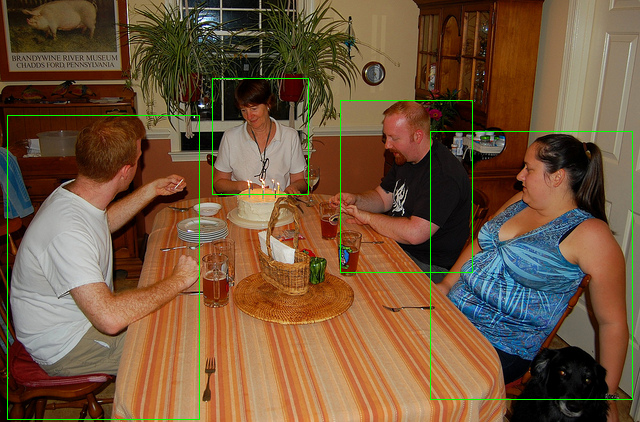

In [107]:
igg = cv2.imread("/root/fiftyone/coco-2017/train/data/000000000790.jpg")
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].to('cpu').numpy().astype("int")
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)

cv2_imshow(igg)

In [108]:
torch.save(model.state_dict(), 'fastrcnn_model.pt')

## inference time

In [132]:
sample_model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn(pretrained=True)fastrcnn_model.pt
sample_model.eval()
input_tensor = torch.randn(1, 3, 35, 35)
with torch.no_grad():
  starting_time = time.time()
  output = sample_model(input_tensor)
  ending_time = time.time()

time_for_inference = ending_time - starting_time
print(f"Time Taken for Inference: \n {time_for_inference:.4f} seconds")

Time Taken for Inference: 
 0.1502 seconds


In [177]:

sample_model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
sample_model.eval()
input_tensor = torch.randn(1, 3, 35, 35)
with torch.no_grad():
  starting_time = time.time()
  output = sample_model(input_tensor)
  ending_time = time.time()

time_for_inference = ending_time - starting_time
print(f"Time Taken for Inference: \n {time_for_inference:.4f} seconds")

Time Taken for Inference: 
 0.5124 seconds


In [133]:
# Print a ground truth detection
sample = dataset.first()
print(sample.ground_truth.detections[0])

<Detection: {
    'id': '6568a56d021e2446228021a4',
    'attributes': {},
    'tags': [],
    'label': 'umbrella',
    'bounding_box': [0.0, 0.0783125, 0.9515176715176715, 0.6724218750000001],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'accessory',
    'iscrowd': 0,
}>


In [67]:
print(dataset.get_evaluation_info("eval"))

{
    "key": "eval",
    "version": "0.22.3",
    "timestamp": "2023-11-30T14:30:41.407000",
    "config": {
        "method": "coco",
        "cls": "fiftyone.utils.eval.coco.COCOEvaluationConfig",
        "pred_field": "faster_rcnn",
        "gt_field": "ground_truth",
        "iou": 0.5,
        "classwise": true,
        "iscrowd": "iscrowd",
        "use_masks": false,
        "use_boxes": false,
        "tolerance": null,
        "compute_mAP": true,
        "iou_threshs": [
            0.5,
            0.55,
            0.6,
            0.65,
            0.7,
            0.75,
            0.8,
            0.85,
            0.9,
            0.95
        ],
        "max_preds": 100,
        "error_level": 1
    }
}


## evaluation

In [142]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections"],
    classes=["person"],
    max_samples=500,
    drop_existing_dataset=True,
)

session = fo.launch_app(dataset)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


Deleting existing dataset 'coco-2017-train-500'


INFO:fiftyone.zoo.datasets:Deleting existing dataset 'coco-2017-train-500'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |█████████████████| 500/500 [3.2s elapsed, 0s remaining, 142.2 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [3.2s elapsed, 0s remaining, 142.2 samples/s]      


Dataset 'coco-2017-train-500' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-500' created


In [143]:
print(dataset)
#print(dataset_test)

Name:        coco-2017-train-500
Media type:  image
Num samples: 500
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [144]:
# Print a ground truth detection
sample = dataset.first()
print(sample.ground_truth.detections[1])

<Detection: {
    'id': '6568aee4021e24462280b2d6',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.3483991683991684,
        0.25451562499999997,
        0.6457588357588357,
        0.726859375,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'person',
    'iscrowd': 0,
}>


In [145]:
from PIL import Image
from torchvision.transforms import functional as func

import fiftyone as fo

# Get class list
classes = 'person'

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |█████████████████| 500/500 [53.4s elapsed, 0s remaining, 9.7 samples/s]       


INFO:eta.core.utils: 100% |█████████████████| 500/500 [53.4s elapsed, 0s remaining, 9.7 samples/s]       


Finished adding predictions


In [146]:
from fiftyone import ViewField as F

# Only contains detections with confidence >= 0.75
high_conf_view = predictions_view.filter_labels("faster_rcnn", (F("confidence") > 0.75) & (F("label").is_in(("person"))), only_matches=True)

In [147]:
# Print some information about the view
print(high_conf_view)

Dataset:     coco-2017-train-4000
Media type:  image
Num samples: 0
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:      fiftyone.core.fields.IntField
    eval_fp:      fiftyone.core.fields.IntField
    eval_fn:      fiftyone.core.fields.IntField
View stages:
    1. Take(size=500, seed=43)
    2. FilterLabels(field='faster_rcnn', filter={'$and': [{...}, {...}]}, only_matches=True, trajectories=False)


In [148]:
# Evaluate the predictions in the `faster_rcnn` field of our `high_conf_view`
# with respect to the objects in the `ground_truth` field
results = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,

)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████████| 0/0 [17.9ms elapsed, ? remaining, ? samples/s] 


INFO:eta.core.utils: 100% |█████████████████████| 0/0 [17.9ms elapsed, ? remaining, ? samples/s] 


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████████| 0/0 [13.3ms elapsed, ? remaining, ? samples/s] 


INFO:eta.core.utils: 100% |█████████████████████| 0/0 [13.3ms elapsed, ? remaining, ? samples/s] 


## faterRCNN

In [ ]:
from PIL import Image
from torchvision.transforms import functional as func

import fiftyone as fo

# Get class list
classes = 'person'

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes,
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |█████████████████| 350/350 [23.4s elapsed, 0s remaining, 19.5 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 350/350 [23.4s elapsed, 0s remaining, 19.5 samples/s]      


Finished adding predictions


## FASTERRCNN_MOBILENET_V3_LARGE_FPN

In [ ]:
import torch
import torchvision

# Run the model on GPU if it is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load a pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
model.to(device)
model.eval()

print("Model ready")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth
100%|██████████| 74.2M/74.2M [00:00<00:00, 166MB/s]


Model ready


In [ ]:
dataset.persistent = True

In [ ]:
print(dataset)

Name:        coco-2017-train-4000
Media type:  image
Num samples: 4000
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [ ]:
# Print a ground truth detection
sample = dataset.first()
print(sample.ground_truth.detections[0])

<Detection: {
    'id': '6568090c0fafc6c8a66c277d',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.3483991683991684,
        0.25451562499999997,
        0.6457588357588357,
        0.726859375,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'person',
    'iscrowd': 0,
}>


In [ ]:
session = fo.launch_app(dataset)


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.22.3

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.22.3

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



In [ ]:
predictions_view = dataset.take(500, seed=43)

 100% |█████████████████| 500/500 [40.5s elapsed, 0s remaining, 15.2 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [40.5s elapsed, 0s remaining, 15.2 samples/s]      


Finished adding predictions


In [ ]:
session.view = predictions_view

In [ ]:
from fiftyone import ViewField as F

# Only contains detections with confidence >= 0.75
high_conf_view = predictions_view.filter_labels("faster_rcnn", F("confidence") > 0.75, only_matches=False)

In [ ]:
print(high_conf_view)

Dataset:     coco-2017-train-4000
Media type:  image
Num samples: 500
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. Take(size=500, seed=43)
    2. FilterLabels(field='faster_rcnn', filter={'$gt': ['$$this.confidence', 0.75]}, only_matches=False, trajectories=False)


In [ ]:
# Print a prediction from the view to verify that its confidence is > 0.75
sample = high_conf_view.first()
print(sample.faster_rcnn.detections[0])

<Detection: {
    'id': '65680c7c0fafc6c8a66cdca2',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.4468437671661377,
        0.17580012555392283,
        0.48923420906066895,
        0.8033590496711012,
    ],
    'mask': None,
    'confidence': 0.9995365142822266,
    'index': None,
}>


In [ ]:
results = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████| 500/500 [12.3s elapsed, 0s remaining, 61.4 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [12.3s elapsed, 0s remaining, 61.4 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████| 500/500 [5.1s elapsed, 0s remaining, 94.1 samples/s]       


INFO:eta.core.utils: 100% |█████████████████| 500/500 [5.1s elapsed, 0s remaining, 94.1 samples/s]       


In [ ]:
# Get the 10 most common classes in the dataset
counts = dataset.count_values("ground_truth.detections.label")
classes_top1 = sorted(counts, key=counts.get, reverse=True)[:1]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top1)

              precision    recall  f1-score   support

      person       0.92      0.66      0.77      1970

   micro avg       0.92      0.66      0.77      1970
   macro avg       0.92      0.66      0.77      1970
weighted avg       0.92      0.66      0.77      1970



In [ ]:
print(results.mAP())

0.4400056939754747


In [ ]:
plot = results.plot_pr_curves(classes=["person"])
plot.show()

# Sample-level analysis

In [ ]:
print(dataset)

Name:        coco-2017-train-4000
Media type:  image
Num samples: 4000
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:      fiftyone.core.fields.IntField
    eval_fp:      fiftyone.core.fields.IntField
    eval_fn:      fiftyone.core.fields.IntField


In [ ]:
sample = high_conf_view.first()
print(sample.faster_rcnn.detections[0])

<Detection: {
    'id': '65680c7c0fafc6c8a66cdca2',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.4468437671661377,
        0.17580012555392283,
        0.48923420906066895,
        0.8033590496711012,
    ],
    'mask': None,
    'confidence': 0.9995365142822266,
    'index': None,
    'eval_iou': 0.8877662264764106,
    'eval_id': '6568091e0fafc6c8a66c833b',
    'eval': 'tp',
}>


In [ ]:
print(dataset.list_evaluations())

['eval']


In [ ]:
print(dataset.get_evaluation_info("eval"))

{
    "key": "eval",
    "version": "0.22.3",
    "timestamp": "2023-11-30T04:21:46.057000",
    "config": {
        "method": "coco",
        "cls": "fiftyone.utils.eval.coco.COCOEvaluationConfig",
        "pred_field": "faster_rcnn",
        "gt_field": "ground_truth",
        "iou": 0.5,
        "classwise": true,
        "iscrowd": "iscrowd",
        "use_masks": false,
        "use_boxes": false,
        "tolerance": null,
        "compute_mAP": true,
        "iou_threshs": [
            0.5,
            0.55,
            0.6,
            0.65,
            0.7,
            0.75,
            0.8,
            0.85,
            0.9,
            0.95
        ],
        "max_preds": 100,
        "error_level": 1
    }
}


In [ ]:
# Load the view on which we ran the `eval` evaluation
eval_view = dataset.load_evaluation_view("eval")
print(eval_view)

Dataset:     coco-2017-train-4000
Media type:  image
Num samples: 500
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:      fiftyone.core.fields.IntField
    eval_fp:      fiftyone.core.fields.IntField
    eval_fn:      fiftyone.core.fields.IntField
View stages:
    1. Take(size=500, seed=43)
    2. FilterLabels(field='faster_rcnn', filter={'$gt': ['$$this.confidence', 0.75]}, only_matches=False, trajectories=False)


In [ ]:
eval_patches = dataset.to_evaluation_patches("eval")
print(eval_patches)

Dataset:     coco-2017-train-4000
Media type:  image
Num patches: 33367
Patch fields:
    id:           fiftyone.core.fields.ObjectIdField
    sample_id:    fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    crowd:        fiftyone.core.fields.BooleanField
    type:         fiftyone.core.fields.StringField
    iou:          fiftyone.core.fields.FloatField
View stages:
    1. ToEvaluationPatches(eval_key='eval', config=None)


In [ ]:
session.view = high_conf_view

In [ ]:
session.view = high_conf_view.sort_by("eval_tp", reverse=True)

In [ ]:
dataset.compute_metadata()

In [ ]:
#
# Create an expression that will match objects whose bounding boxes have
# area less than 32^2 pixels
#
# Bounding box format is [top-left-x, top-left-y, width, height]
# with relative coordinates in [0, 1], so we multiply by image
# dimensions to get pixel area
#
bbox_area = (
    F("$metadata.width") * F("bounding_box")[2] *
    F("$metadata.height") * F("bounding_box")[3]
)
small_boxes = bbox_area < 32 ** 2

# Create a view that contains only small (and high confidence) predictions
small_boxes_view = high_conf_view.filter_labels("faster_rcnn", small_boxes)

session.view = small_boxes_view

## FASTERRCNN_MOBILENET_V3_LARGE_320_FPN

In [ ]:
import torch
import torchvision

# Run the model on GPU if it is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load a pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn(pretrained=True)
model.to(device)
model.eval()

print("Model ready")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT` to get the most up-to-date weights.



Model ready


In [ ]:
dataset.persistent = True

In [ ]:
print(dataset)

Name:        coco-2017-train-5000
Media type:  image
Num samples: 5000
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:      fiftyone.core.fields.IntField
    eval_fp:      fiftyone.core.fields.IntField
    eval_fn:      fiftyone.core.fields.IntField


In [ ]:
from torchvision.transforms import functional as func

import fiftyone as fo

# Get class list
classes = 'person'

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes,
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |█████████████████| 350/350 [27.5s elapsed, 0s remaining, 6.9 samples/s]       


INFO:eta.core.utils: 100% |█████████████████| 350/350 [27.5s elapsed, 0s remaining, 6.9 samples/s]       


Finished adding predictions


In [ ]:
# Print a ground truth detection
sample = dataset.first()
print(sample.ground_truth.detections[1])

<Detection: {
    'id': '65682e49e5b5ff7f372af3cf',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.3483991683991684,
        0.25451562499999997,
        0.6457588357588357,
        0.726859375,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'person',
    'iscrowd': 0,
}>


In [ ]:
predictions_view = dataset.take(350, seed=43)

In [ ]:
from fiftyone import ViewField as F

# Only contains detections with confidence >= 0.75
high_conf_view = predictions_view.filter_labels("faster_rcnn", F("confidence") > 0.75, only_matches=False)

In [ ]:
print(high_conf_view)

Dataset:     coco-2017-train-5000
Media type:  image
Num samples: 350
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:      fiftyone.core.fields.IntField
    eval_fp:      fiftyone.core.fields.IntField
    eval_fn:      fiftyone.core.fields.IntField
View stages:
    1. Take(size=350, seed=43)
    2. FilterLabels(field='faster_rcnn', filter={'$gt': ['$$this.confidence', 0.75]}, only_matches=False, trajectories=False)


In [ ]:
# Print a prediction from the view to verify that its confidence is > 0.75
sample = high_conf_view.first()
print(sample.faster_rcnn.detections[0])

<Detection: {
    'id': '656830b9e5b5ff7f372be928',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.47574377059936523,
        0.1666470653605911,
        0.4685887336730957,
        0.7810469573398806,
    ],
    'mask': None,
    'confidence': 0.999319314956665,
    'index': None,
}>


In [ ]:
results = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████| 350/350 [10.6s elapsed, 0s remaining, 26.3 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 350/350 [10.6s elapsed, 0s remaining, 26.3 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████| 350/350 [7.3s elapsed, 0s remaining, 75.0 samples/s]       


INFO:eta.core.utils: 100% |█████████████████| 350/350 [7.3s elapsed, 0s remaining, 75.0 samples/s]       


In [ ]:
# Get the 10 most common classes in the dataset
counts = dataset.count_values("ground_truth.detections.label")
classes_top1 = sorted(counts, key=counts.get, reverse=True)[:10]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top1)

              precision    recall  f1-score   support

      person       0.57      0.39      0.46       455
         car       0.00      0.00      0.00        57
       chair       0.00      0.00      0.00        34
     handbag       0.00      0.00      0.00        11
      bottle       0.00      0.00      0.00        36
         cup       0.00      0.00      0.00        28
    umbrella       0.00      0.00      0.00        15
        book       0.00      0.00      0.00        20
        kite       0.00      0.00      0.00        10
dining table       0.00      0.00      0.00        12

   micro avg       0.57      0.26      0.36       678
   macro avg       0.06      0.04      0.05       678
weighted avg       0.39      0.26      0.31       678



In [ ]:
# Get the 10 most common classes in the dataset
counts = dataset.count_values("ground_truth.detections.label")
classes_top1 = sorted(counts, key=counts.get, reverse=True)[:1]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top1)

              precision    recall  f1-score   support

      person       0.92      0.66      0.77      1331

   micro avg       0.92      0.66      0.77      1331
   macro avg       0.92      0.66      0.77      1331
weighted avg       0.92      0.66      0.77      1331



In [ ]:
print(results.mAP())

0.45685618497939556


In [ ]:
plot = results.plot_pr_curves(classes=["person"])
plot.show()

In [ ]:
# Get the 10 most common classes in the dataset
counts = dataset.count_values("ground_truth.detections.label")
classes_top1 = sorted(counts, key=counts.get, reverse=True)[:1]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top1)

              precision    recall  f1-score   support

      person       0.55      0.42      0.48      1419

   micro avg       0.55      0.42      0.48      1419
   macro avg       0.55      0.42      0.48      1419
weighted avg       0.55      0.42      0.48      1419



In [ ]:
print(results.mAP())

0.0031006318794090017


In [ ]:
plot = results.plot_pr_curves(classes=["person"])
plot.show()

# Before


In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz


dataset_train = foz.load_zoo_dataset("coco-2017", split="validation", label_types=["detections"], classes=["person"], max_samples=500)
dataset_train.persistent = True

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


Loading existing dataset 'coco-2017-validation-500'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'coco-2017-validation-500'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [ ]:
# Print some information about the dataset
print(dataset_train)

Name:        coco-2017-validation-500
Media type:  image
Num samples: 500
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [ ]:
# Print a ground truth detection
sample = dataset_train.first()
print(sample.ground_truth.detections[0])

<Detection: {
    'id': '65680a720fafc6c8a66cc866',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.645,
        0.3699765258215963,
        0.082890625,
        0.3239671361502347,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'person',
    'iscrowd': 0,
}>


In [ ]:
predictions_view = dataset.take(100, seed=51)

In [ ]:
from PIL import Image
from torchvision.transforms import functional as func

import fiftyone as fo

# Get class list
classes = 'person'

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes,
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |█████████████████| 100/100 [8.4s elapsed, 0s remaining, 10.6 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 100/100 [8.4s elapsed, 0s remaining, 10.6 samples/s]      


Finished adding predictions


In [ ]:
from fiftyone import ViewField as F

# Only contains detections with confidence >= 0.75
high_conf_view = predictions_view.filter_labels("faster_rcnn", F("confidence") > 0.75, only_matches=False)

In [ ]:
# Print some information about the view
print(high_conf_view)

Dataset:     coco-2017-train-5000
Media type:  image
Num samples: 100
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:      fiftyone.core.fields.IntField
    eval_fp:      fiftyone.core.fields.IntField
    eval_fn:      fiftyone.core.fields.IntField
View stages:
    1. Take(size=100, seed=51)
    2. FilterLabels(field='faster_rcnn', filter={'$gt': ['$$this.confidence', 0.75]}, only_matches=False, trajectories=False)


In [ ]:
# Print a prediction from the view to verify that its confidence is > 0.75
sample = high_conf_view.first()
print(sample.faster_rcnn.detections[0])

<Detection: {
    'id': '65683553e5b5ff7f372c93f6',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.00423298142850399,
        0.1546826889935662,
        0.35974464416503904,
        0.8453173110064338,
    ],
    'mask': None,
    'confidence': 0.9995085000991821,
    'index': None,
}>


In [ ]:
# Evaluate the predictions in the `faster_rcnn` field of our `high_conf_view`
# with respect to the objects in the `ground_truth` field
results = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████| 100/100 [5.1s elapsed, 0s remaining, 20.6 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 100/100 [5.1s elapsed, 0s remaining, 20.6 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████| 100/100 [2.2s elapsed, 0s remaining, 56.5 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 100/100 [2.2s elapsed, 0s remaining, 56.5 samples/s]      


In [ ]:
# Get the 10 most common classes in the dataset
counts = dataset.count_values("ground_truth.detections.label")
classes_top10 = sorted(counts, key=counts.get, reverse=True)[:10]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top10)

              precision    recall  f1-score   support

      person       0.57      0.39      0.46       455
         car       0.00      0.00      0.00        57
       chair       0.00      0.00      0.00        34
     handbag       0.00      0.00      0.00        11
      bottle       0.00      0.00      0.00        36
         cup       0.00      0.00      0.00        28
    umbrella       0.00      0.00      0.00        15
        book       0.00      0.00      0.00        20
        kite       0.00      0.00      0.00        10
dining table       0.00      0.00      0.00        12

   micro avg       0.57      0.26      0.36       678
   macro avg       0.06      0.04      0.05       678
weighted avg       0.39      0.26      0.31       678



In [ ]:
print(results.mAP())

0.0032722163446030996


## coba-coba sebelumnya

In [ ]:
model = foz.load_zoo_model("mobilenet-v2-imagenet-torch")

dataset.apply_model(model, label_field="person")

session = fo.launch_app(dataset)

INFO:fiftyone.core.models:Downloading model from 'https://download.pytorch.org/models/mobilenet_v2-b0353104.pth'...


 100% |████|  108.4Mb/108.4Mb [138.9ms elapsed, 0s remaining, 780.7Mb/s]     


INFO:eta.core.utils: 100% |████|  108.4Mb/108.4Mb [138.9ms elapsed, 0s remaining, 780.7Mb/s]     
Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 44.7MB/s]


 100% |███████████████| 4000/4000 [2.4m elapsed, 0s remaining, 19.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 4000/4000 [2.4m elapsed, 0s remaining, 19.9 samples/s]      



Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.22.3

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.22.3

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



In [ ]:
# Iterate over the dataset
for sample in dataset:
    # Get the detections
    detections = sample.ground_truth.detections
    # Filter out non-person detections
    detections = [d for d in detections if d.label == "person"]
    # Update the detections
    sample.ground_truth.detections = detections
    # Save the sample
    sample.save()

In [ ]:
# Iterate over the dataset_test
for sample in dataset_test:
    # Get the detections
    detections = sample.ground_truth.detections
    # Filter out non-person detections
    detections = [d for d in detections if d.label == "person"]
    # Update the detections
    sample.ground_truth.detections = detections
    # Save the sample
    sample.save()

In [ ]:
print(dataset)

Name:        coco-2017-train-4000
Media type:  image
Num samples: 4000
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [ ]:
view = dataset.view()
sample = view.take(1).first()
sample

<SampleView: {
    'id': '6567ee12436ef1ab8a28d634',
    'media_type': 'image',
    'filepath': '/root/fiftyone/coco-2017/train/data/000000031084.jpg',
    'tags': ['train'],
    'metadata': <ImageMetadata: {
        'size_bytes': None,
        'mime_type': None,
        'width': 640,
        'height': 480,
        'num_channels': None,
    }>,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '6567ee12436ef1ab8a28d5a5',
                'attributes': {},
                'tags': [],
                'label': 'person',
                'bounding_box': [0.3141875, 0.0, 0.684125, 0.9842291666666667],
                'mask': None,
                'confidence': None,
                'index': None,
                'supercategory': 'person',
                'iscrowd': 0,
            }>,
        ],
    }>,
}>

In [ ]:
width = sample.metadata.width
height = sample.metadata.height
bbox = sample.ground_truth.detections[0].bounding_box
x1, y1, x2, y2 = bbox
x1 * width, y1 * height, x2 * width, y2 * height

(201.08, 0.0, 437.84, 472.43)

In [ ]:
# Classes list
classes = dataset.distinct("ground_truth.detections.label")

# The directory in which the dataset's images are stored
IMAGES_DIR = os.path.dirname(dataset.first().filepath)

# Export some labels in COCO format
dataset.take(100).export(
    dataset_type=fo.types.COCODetectionDataset,
    label_field="ground_truth",
    labels_path="coco.json",
    classes=classes,
)

In [ ]:
sample = view['/root/fiftyone/coco-2017/train/data/000000000308.jpg']

In [ ]:
width = sample.metadata.width
height = sample.metadata.height
bbox = sample.ground_truth.detections[0].bounding_box
x1, y1, x2, y2 = bbox
x1, y1, x2, y2

(0.2104375, 0.06725352112676056, 0.2089375, 0.9282629107981221)

In [ ]:
x1 *  width, y1 * height, x2 * width, y2 * height

(134.68, 28.65, 133.72, 395.44)

In [ ]:
x2 * width * y2 * height

52878.2368

In [ ]:
transform = T.Compose([
    T.ToPILImage(),
    #T.CenterCrop(10),
    T.ToTensor(),
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transforms, root):
        self.dataset = dataset
        self.transforms = transforms
        self.root = root
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "data"))))

    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.root, "data", self.imgs[idx])
        img = read_image(img_path, mode=ImageReadMode.RGB )

        view = self.dataset.view()
        sample = view[img_path]

        # get bounding box coordinates for each detection
        width = sample.metadata.width
        height = sample.metadata.height
        boxes = []
        for d in sample.ground_truth.detections:
            x,y,w,h = d.bounding_box
            x1 = x * width
            y1 = y * height
            x2 = x1 + (w * width)
            y2 = y1 + (h * height)
            boxes.append([x1, y1, x2, y2])

        boxes = torch.tensor(boxes);

        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        num_objs = len(sample.ground_truth.detections)

        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)

        image_id = idx
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        # Wrap sample and targets into torchvision tv_tensors:
        # img = tv_tensors.Image(img)

        target = {}
        target["boxes"] = boxes
        # target["masks"] = None
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img = self.transforms(img)

        return (img, target)

    def __len__(self):
        return len(self.imgs)

In [ ]:
from torch.utils.data import DataLoader
import utils

train_data_dir = '/root/fiftyone/coco-2017/train'
test_data_dir = '/root/fiftyone/coco-2017/validation'

train_dataset = CustomDataset(root=train_data_dir, dataset=dataset, transforms=transform)
test_dataset = CustomDataset(root=test_data_dir, dataset=dataset_test, transforms=transform)
# train_dataset = ObjectDataset(dataset, transforms=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=utils.collate_fn)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=utils.collate_fn)

In [ ]:
import matplotlib.pyplot as plt

images, targets = next(iter(train_loader))
image = images[0]
target = targets[0]
image, target

(tensor([[[ 0.0745,  0.0745,  0.0667,  ...,  0.6471,  0.6471,  0.6392],
          [ 0.0667,  0.0667,  0.0745,  ...,  0.6392,  0.6392,  0.6314],
          [ 0.0745,  0.0667,  0.0667,  ...,  0.6392,  0.6392,  0.6392],
          ...,
          [ 0.3176,  0.4431,  0.2627,  ...,  0.1765,  0.2784,  0.4353],
          [ 0.1373,  0.3098,  0.2314,  ...,  0.2471,  0.3333,  0.3569],
          [ 0.2549,  0.2000,  0.2784,  ...,  0.2549,  0.2392,  0.2235]],
 
         [[ 0.0745,  0.0745,  0.0824,  ...,  0.7255,  0.7255,  0.7176],
          [ 0.0667,  0.0745,  0.0824,  ...,  0.7255,  0.7255,  0.7176],
          [ 0.0824,  0.0745,  0.0745,  ...,  0.7255,  0.7255,  0.7255],
          ...,
          [ 0.2314,  0.3569,  0.1765,  ...,  0.0745,  0.1451,  0.3020],
          [ 0.0588,  0.2314,  0.1529,  ...,  0.2000,  0.2392,  0.2235],
          [ 0.1451,  0.1216,  0.2235,  ...,  0.1451,  0.1922,  0.1843]],
 
         [[ 0.2627,  0.2627,  0.2471,  ...,  0.9216,  0.9216,  0.9137],
          [ 0.2549,  0.2392,

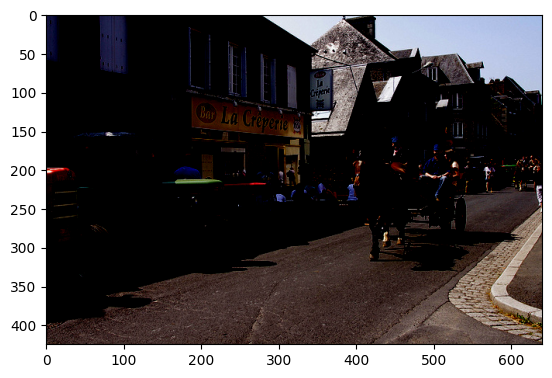

In [ ]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(image.permute(1, 2, 0) )

In [ ]:
num = len(target['boxes'])

igg = image.permute(1, 2, 0).numpy().astype(np.uint8).copy()
for i in range(num):
  x1, y1, x2, y2 = np.array(target['boxes'][i]).astype("int")
  print(x1,y1,x2,y2)
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (255, 0, 0), 1)

480 166 524 246
629 193 639 256
163 176 201 212
314 197 323 225
539 189 550 232
561 193 579 232
267 186 297 285
332 212 352 238
351 215 375 265
349 207 362 231
300 196 307 231
441 158 482 212
513 172 535 225
246 179 635 283


In [ ]:
type(target['boxes'][i])

torch.Tensor

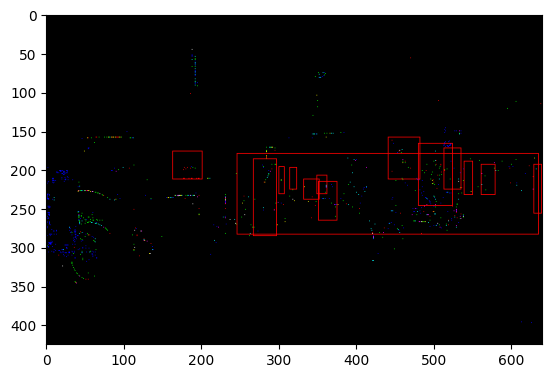

In [ ]:
plt.imshow(igg)

In [ ]:
import torchvision

model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
num_class = 2
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_class)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth
100%|██████████| 74.2M/74.2M [00:00<00:00, 149MB/s]


In [ ]:
from engine import train_one_epoch, evaluate
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.005,
    momentum=0.9,
    weight_decay=0.0005
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

num_epochs = 5

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, test_loader, device=device)

print("That's it!")

Epoch: [0]  [   0/1000]  eta: 2:52:26  lr: 0.000010  loss: 1.3342 (1.3342)  loss_classifier: 0.7804 (0.7804)  loss_box_reg: 0.1896 (0.1896)  loss_objectness: 0.2876 (0.2876)  loss_rpn_box_reg: 0.0766 (0.0766)  time: 10.3467  data: 0.0463  max mem: 578
Epoch: [0]  [  10/1000]  eta: 0:17:59  lr: 0.000060  loss: 1.2803 (1.2806)  loss_classifier: 0.6958 (0.7303)  loss_box_reg: 0.3041 (0.3376)  loss_objectness: 0.1236 (0.1760)  loss_rpn_box_reg: 0.0319 (0.0367)  time: 1.0905  data: 0.0465  max mem: 646
Epoch: [0]  [  20/1000]  eta: 0:10:37  lr: 0.000110  loss: 1.1669 (1.1874)  loss_classifier: 0.6559 (0.6522)  loss_box_reg: 0.3041 (0.3331)  loss_objectness: 0.1119 (0.1678)  loss_rpn_box_reg: 0.0285 (0.0343)  time: 0.1657  data: 0.0518  max mem: 646
Epoch: [0]  [  30/1000]  eta: 0:08:00  lr: 0.000160  loss: 0.9120 (1.0979)  loss_classifier: 0.4860 (0.5651)  loss_box_reg: 0.3518 (0.3320)  loss_objectness: 0.1325 (0.1652)  loss_rpn_box_reg: 0.0329 (0.0356)  time: 0.1676  data: 0.0549  max mem:

In [ ]:
transform1 = T.Compose([
    T.ToTensor(),
])

In [ ]:
ig = Image.open("/root/fiftyone/coco-2017/train/data/000000000790.jpg")
img = transform1(ig).to('cuda')

In [ ]:
with torch.no_grad():
  pred = model([img])

In [ ]:
pred

[{'boxes': tensor([[  8.0445, 109.5305, 210.7677, 414.5882],
          [440.4431, 129.4047, 630.2022, 415.0820],
          [210.5491,  80.8647, 313.9458, 195.6564],
          [325.5675,  99.2349, 471.6870, 267.4242],
          [  0.0000, 137.5604,  31.4208, 231.2432],
          [512.8716, 348.9830, 618.2840, 417.8174],
          [  0.0000, 131.0034,  16.1387, 237.9393],
          [  0.0000, 133.6231,  50.2197, 260.7235]], device='cuda:0'),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'),
  'scores': tensor([0.9997, 0.9987, 0.9985, 0.9978, 0.7495, 0.5086, 0.4432, 0.0994],
         device='cuda:0')}]

In [ ]:
bboxes, label, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [ ]:
num = torch.argwhere(scores > 0.6).shape[0]

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

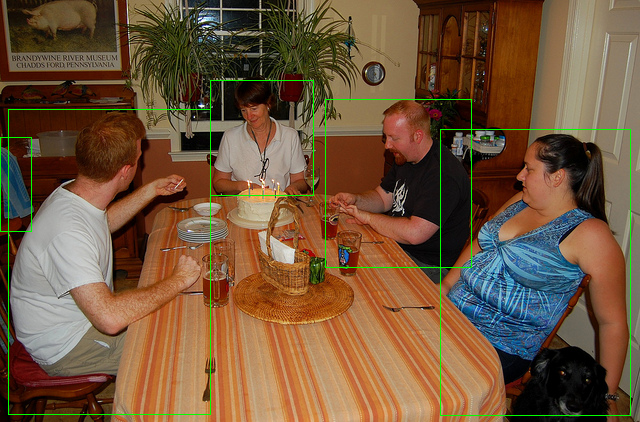

In [ ]:
igg = cv2.imread("/root/fiftyone/coco-2017/train/data/000000000790.jpg")
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].to('cpu').numpy().astype("int")
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)

cv2_imshow(igg)

## FiftyOne

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections"],
    classes=["person"],
    max_samples=25,
    drop_existing_dataset=True,
)

session = fo.launch_app(dataset)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |███████████████████| 25/25 [223.0ms elapsed, 0s remaining, 112.1 samples/s]     


INFO:eta.core.utils: 100% |███████████████████| 25/25 [223.0ms elapsed, 0s remaining, 112.1 samples/s]     


Dataset 'coco-2017-train-25' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-25' created



Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.22.3

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.22.3

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



In [ ]:
print(dataset)
#print(dataset_test)

Name:        coco-2017-train-25
Media type:  image
Num samples: 25
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [ ]:
# Print a ground truth detection
sample = dataset.first()
print(sample.ground_truth.detections[1])

<Detection: {
    'id': '6565fa55d31db5a55152a4bb',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.3483991683991684,
        0.25451562499999997,
        0.6457588357588357,
        0.726859375,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'person',
    'iscrowd': 0,
    'eval': 'tp',
    'eval_id': '6565fa5fd31db5a55152a609',
    'eval_iou': 0.8102058101995591,
}>


In [ ]:
# Choose a random subset of 20 samples to add predictions to
predictions_view = dataset.take(20, seed=51)

In [ ]:
from PIL import Image
from torchvision.transforms import functional as func

import fiftyone as fo

# Get class list
classes = 'person'

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |███████████████████| 20/20 [1.5s elapsed, 0s remaining, 14.7 samples/s]         


INFO:eta.core.utils: 100% |███████████████████| 20/20 [1.5s elapsed, 0s remaining, 14.7 samples/s]         


Finished adding predictions


In [ ]:
session.view = predictions_view

In [ ]:
# Resets the session; the entire dataset will now be shown
session.view = None

In [ ]:
# Use the view bar to create an `Exists(faster_rcnn, True)` stage
# Now your view contains only the 100 samples with predictions in `faster_rcnn` field
session.show()

In [ ]:
from fiftyone import ViewField as F

# Only contains detections with confidence >= 0.75
high_conf_view = predictions_view.filter_labels("faster_rcnn", (F("confidence") > 0.75) & (F("label").is_in(("person"))), only_matches=True)

In [ ]:
# Print some information about the view
print(high_conf_view)

Dataset:     coco-2017-train-25
Media type:  image
Num samples: 16
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. Take(size=20, seed=51)
    2. FilterLabels(field='faster_rcnn', filter={'$and': [{...}, {...}]}, only_matches=True, trajectories=False)


In [ ]:
# Print a prediction from the view to verify that its confidence is > 0.75
sample = high_conf_view.first()
print(sample.faster_rcnn.detections[0])

<Detection: {
    'id': '6565fa5fd31db5a55152a5f7',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.42667999267578127,
        0.3854718526204427,
        0.15326180458068847,
        0.48081080118815106,
    ],
    'mask': None,
    'confidence': 0.9995474219322205,
    'index': None,
}>


In [ ]:
# Load high confidence view in the App
session.view = high_conf_view

In [ ]:
# Evaluate the predictions in the `faster_rcnn` field of our `high_conf_view`
# with respect to the objects in the `ground_truth` field
results = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,

)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████████| 16/16 [702.9ms elapsed, 0s remaining, 22.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████████| 16/16 [702.9ms elapsed, 0s remaining, 22.8 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████████| 16/16 [266.3ms elapsed, 0s remaining, 60.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████████| 16/16 [266.3ms elapsed, 0s remaining, 60.1 samples/s]      


In [ ]:
# Get the 10 most common classes in the dataset
counts = dataset.count_values("faster_rcnn.detections.label")
classes_top10 = sorted(counts, key=counts.get, reverse=True)[:10]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top10)

              precision    recall  f1-score   support

      person       0.97      0.42      0.59        73

   micro avg       0.97      0.42      0.59        73
   macro avg       0.97      0.42      0.59        73
weighted avg       0.97      0.42      0.59        73



In [ ]:
plot = results.plot_pr_curves(classes=["person"])
plot.show()

In [ ]:
# Our dataset's schema now contains `eval_*` fields
print(dataset)

Name:        coco-2017-train-25
Media type:  image
Num samples: 25
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:      fiftyone.core.fields.IntField
    eval_fp:      fiftyone.core.fields.IntField
    eval_fn:      fiftyone.core.fields.IntField


In [ ]:
# Our detections have helpful evaluation data on them
sample = high_conf_view.first()
print(sample.faster_rcnn.detections[0])

<Detection: {
    'id': '6565fa5fd31db5a55152a5f7',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.42667999267578127,
        0.3854718526204427,
        0.15326180458068847,
        0.48081080118815106,
    ],
    'mask': None,
    'confidence': 0.9995474219322205,
    'index': None,
    'eval_iou': 0.8579217372096201,
    'eval_id': '6565fa56d31db5a55152a54c',
    'eval': 'tp',
}>


In [ ]:
print(dataset.list_evaluations())

['eval']


In [ ]:
print(dataset.get_evaluation_info("eval"))

{
    "key": "eval",
    "version": "0.22.3",
    "timestamp": "2023-11-28T14:34:14.144000",
    "config": {
        "method": "coco",
        "cls": "fiftyone.utils.eval.coco.COCOEvaluationConfig",
        "pred_field": "faster_rcnn",
        "gt_field": "ground_truth",
        "iou": 0.5,
        "classwise": true,
        "iscrowd": "iscrowd",
        "use_masks": false,
        "use_boxes": false,
        "tolerance": null,
        "compute_mAP": true,
        "iou_threshs": [
            0.5,
            0.55,
            0.6,
            0.65,
            0.7,
            0.75,
            0.8,
            0.85,
            0.9,
            0.95
        ],
        "max_preds": 100,
        "error_level": 1
    }
}


In [ ]:
# Load the view on which we ran the `eval` evaluation
eval_view = dataset.load_evaluation_view("eval")
print(eval_view)

Dataset:     coco-2017-train-25
Media type:  image
Num samples: 16
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:      fiftyone.core.fields.IntField
    eval_fp:      fiftyone.core.fields.IntField
    eval_fn:      fiftyone.core.fields.IntField
View stages:
    1. Take(size=20, seed=51)
    2. FilterLabels(field='faster_rcnn', filter={'$and': [{...}, {...}]}, only_matches=True, trajectories=False)


In [ ]:
eval_patches = dataset.to_evaluation_patches("eval")
print(eval_patches)

Dataset:     coco-2017-train-25
Media type:  image
Num patches: 422
Patch fields:
    id:           fiftyone.core.fields.ObjectIdField
    sample_id:    fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    crowd:        fiftyone.core.fields.BooleanField
    type:         fiftyone.core.fields.StringField
    iou:          fiftyone.core.fields.FloatField
View stages:
    1. ToEvaluationPatches(eval_key='eval', config=None)


In [ ]:
session.view = high_conf_view

## Other parameter tuning

In [ ]:
from engine import train_one_epoch, evaluate
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.01,
    momentum=0.9,
    weight_decay=0.0001
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

num_epochs = 5

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, test_loader, device=device)

print("That's it!")

Epoch: [0]  [   0/1000]  eta: 0:03:10  lr: 0.000020  loss: 0.3893 (0.3893)  loss_classifier: 0.1234 (0.1234)  loss_box_reg: 0.2531 (0.2531)  loss_objectness: 0.0110 (0.0110)  loss_rpn_box_reg: 0.0018 (0.0018)  time: 0.1909  data: 0.0649  max mem: 806
Epoch: [0]  [  10/1000]  eta: 0:03:07  lr: 0.000120  loss: 0.3893 (0.3464)  loss_classifier: 0.1255 (0.1215)  loss_box_reg: 0.2269 (0.1961)  loss_objectness: 0.0157 (0.0181)  loss_rpn_box_reg: 0.0081 (0.0107)  time: 0.1893  data: 0.0569  max mem: 806
Epoch: [0]  [  20/1000]  eta: 0:03:07  lr: 0.000220  loss: 0.3944 (0.3550)  loss_classifier: 0.1409 (0.1289)  loss_box_reg: 0.1633 (0.1874)  loss_objectness: 0.0214 (0.0249)  loss_rpn_box_reg: 0.0092 (0.0137)  time: 0.1918  data: 0.0572  max mem: 806
Epoch: [0]  [  30/1000]  eta: 0:02:57  lr: 0.000320  loss: 0.4093 (0.3769)  loss_classifier: 0.1403 (0.1342)  loss_box_reg: 0.1853 (0.2012)  loss_objectness: 0.0260 (0.0253)  loss_rpn_box_reg: 0.0138 (0.0161)  time: 0.1794  data: 0.0526  max mem: 

In [ ]:
# Evaluate the predictions in the `faster_rcnn` field of our `high_conf_view`
# with respect to the objects in the `ground_truth` field
results = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,

)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████████| 16/16 [612.6ms elapsed, 0s remaining, 26.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████████| 16/16 [612.6ms elapsed, 0s remaining, 26.1 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████████| 16/16 [262.7ms elapsed, 0s remaining, 60.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████████| 16/16 [262.7ms elapsed, 0s remaining, 60.9 samples/s]      


In [ ]:
# Get the 10 most common classes in the dataset
counts = dataset.count_values("faster_rcnn.detections.label")
classes_top10 = sorted(counts, key=counts.get, reverse=True)[:10]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top10)

              precision    recall  f1-score   support

      person       0.97      0.42      0.59        73

   micro avg       0.97      0.42      0.59        73
   macro avg       0.97      0.42      0.59        73
weighted avg       0.97      0.42      0.59        73



In [ ]:
# Print a ground truth detection
sample = dataset.first()
print(sample.ground_truth.detections[1])

<Detection: {
    'id': '6565fa55d31db5a55152a4bb',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.3483991683991684,
        0.25451562499999997,
        0.6457588357588357,
        0.726859375,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'person',
    'iscrowd': 0,
    'eval': 'tp',
    'eval_id': '6565fa5fd31db5a55152a609',
    'eval_iou': 0.8102058101995591,
}>


In [ ]:
print(dataset.get_evaluation_info("eval"))

{
    "key": "eval",
    "version": "0.22.3",
    "timestamp": "2023-11-28T15:18:02.216000",
    "config": {
        "method": "coco",
        "cls": "fiftyone.utils.eval.coco.COCOEvaluationConfig",
        "pred_field": "faster_rcnn",
        "gt_field": "ground_truth",
        "iou": 0.5,
        "classwise": true,
        "iscrowd": "iscrowd",
        "use_masks": false,
        "use_boxes": false,
        "tolerance": null,
        "compute_mAP": true,
        "iou_threshs": [
            0.5,
            0.55,
            0.6,
            0.65,
            0.7,
            0.75,
            0.8,
            0.85,
            0.9,
            0.95
        ],
        "max_preds": 100,
        "error_level": 1
    }
}
